**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


In [2]:
df = pd.read_csv('student-por.csv', sep=';')
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [3]:
df.shape

(649, 33)

In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
df1 = pd.read_csv('student-mat.csv', sep = ';')
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


**Concatinate both datasets**

In [6]:
df = pd.read_csv('student-por.csv', sep=';')
df1 = pd.read_csv('student-mat.csv', sep = ';')
data = pd.concat([df, df1], axis=0)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
df1.shape

(395, 33)

In [8]:
df1.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
data = pd.concat([df, df1], axis=0)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

GP    772
MS    272
Name: school, dtype: int64


F    591
M    453
Name: sex, dtype: int64


16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64


U    759
R    285
Name: address, dtype: int64


GT3    738
LE3    306
Name: famsize, dtype: int64


T    923
A    121
Name: Pstatus, dtype: int64


4    306
2    289
3    238
1    202
0      9
Name: Medu, dtype: int64


2    324
1    256
3    231
4    224
0      9
Name: Fedu, dtype: int64


other       399
services    239
at_home     194
teacher     130
health       82
Name: Mjob, dtype: int64


other       584
services    292
teacher      65
at_home      62
health       41
Name: Fjob, dtype: int64


course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64


mother    728
father    243
other      73
Name: guardian, dtype: int64


1    623
2    320
3     77
4     24
Name: traveltime, dtype: int64


2    503
1    317
3    162
4     62
Name: studytime,

In [11]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

**Data Analysis**

In [12]:
for i in data.describe(include='object').columns:
    print(i,': ')
    print(data[i].unique())
    print('--'*60,'\n')

school : 
['GP' 'MS']
------------------------------------------------------------------------------------------------------------------------ 

sex : 
['F' 'M']
------------------------------------------------------------------------------------------------------------------------ 

address : 
['U' 'R']
------------------------------------------------------------------------------------------------------------------------ 

famsize : 
['GT3' 'LE3']
------------------------------------------------------------------------------------------------------------------------ 

Pstatus : 
['A' 'T']
------------------------------------------------------------------------------------------------------------------------ 

Mjob : 
['at_home' 'health' 'other' 'services' 'teacher']
------------------------------------------------------------------------------------------------------------------------ 

Fjob : 
['teacher' 'other' 'services' 'health' 'at_home']
----------------------------------------

In [13]:
data.shape

(1044, 33)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

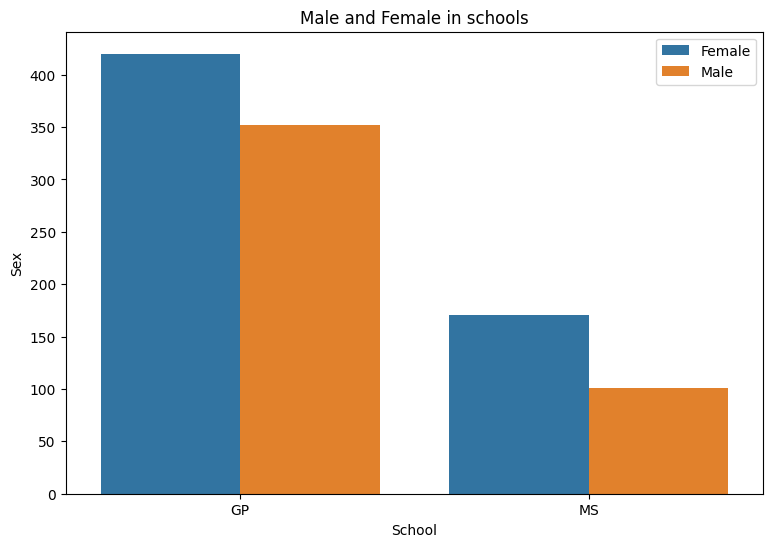

In [15]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x = 'school', hue = 'sex', data = data) 
plt.xlabel('School')
plt.ylabel('Sex')
plt.title('Male and Female in schools')
plt.legend(['Female', 'Male'])
plt.show()

In [16]:
data['age'].value_counts()

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

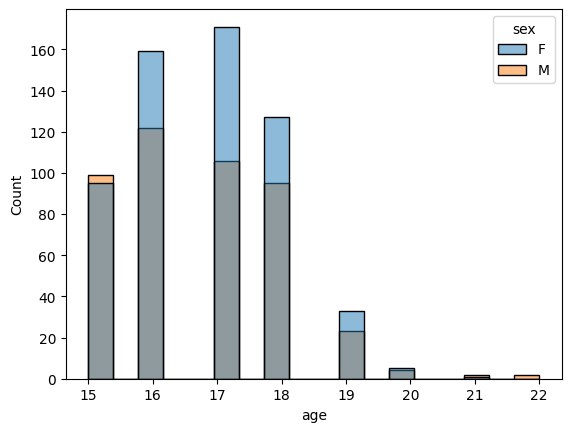

In [17]:
sns.histplot(x = 'age', data=data, color='red', hue='sex')

<AxesSubplot: xlabel='Mjob', ylabel='Count'>

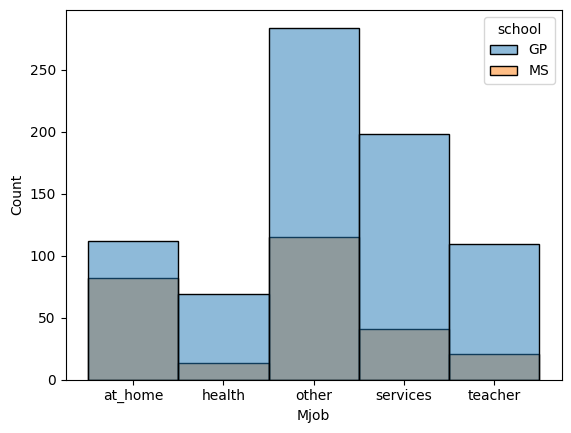

In [18]:
sns.histplot(x = 'Mjob', data=data, color='red', hue='school')

<AxesSubplot: xlabel='Fjob', ylabel='Count'>

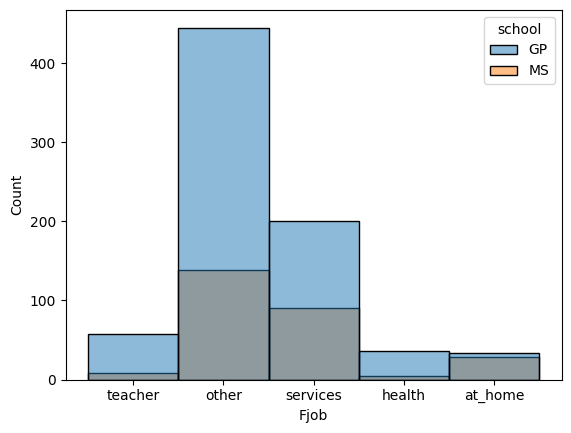

In [19]:
sns.histplot(x = 'Fjob', data=data, color='red', hue='school')

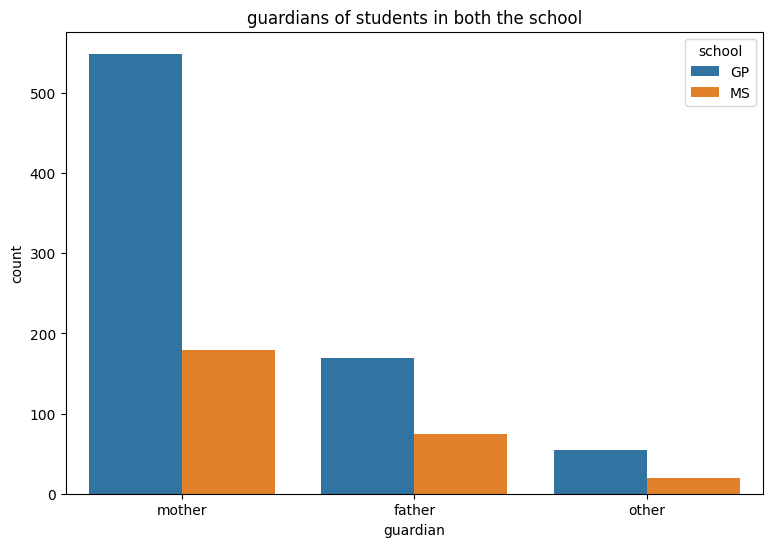

In [20]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x = 'guardian', hue = 'school', data = data) 
plt.xlabel('guardian')
plt.title('guardians of students in both the school')
plt.show()

**Preprocessing**

In [21]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [22]:
data.drop(data[data['G3']==0].index, inplace=True)

In [23]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,16.693277,2.632353,2.411765,1.514706,1.980042,0.226891,3.945378,3.202731,3.146008,1.500000,2.285714,3.552521,4.690126,11.397059,11.608193,11.936975
std,1.236680,1.127667,1.098028,0.720581,0.832200,0.605783,0.918990,1.037607,1.132961,0.926307,1.281711,1.425092,6.332663,2.901088,2.831187,2.919570
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,1.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,10.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [24]:
data.groupby('sex')['G3'].mean()

sex
F    12.048507
M    11.793269
Name: G3, dtype: float64

In [25]:
data.groupby('school')['G3'].mean()

school
GP    12.183381
MS    11.259843
Name: G3, dtype: float64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      952 non-null    object
 1   sex         952 non-null    object
 2   age         952 non-null    int64 
 3   address     952 non-null    object
 4   famsize     952 non-null    object
 5   Pstatus     952 non-null    object
 6   Medu        952 non-null    int64 
 7   Fedu        952 non-null    int64 
 8   Mjob        952 non-null    object
 9   Fjob        952 non-null    object
 10  reason      952 non-null    object
 11  guardian    952 non-null    object
 12  traveltime  952 non-null    int64 
 13  studytime   952 non-null    int64 
 14  failures    952 non-null    int64 
 15  schoolsup   952 non-null    object
 16  famsup      952 non-null    object
 17  paid        952 non-null    object
 18  activities  952 non-null    object
 19  nursery     952 non-null    object
 20  higher    

**Mapping F = 0, M = 1**

In [27]:
data['sex'] = data['sex'].map({'F':0, 'M':1})

**Mapping Urban = 0, Rural = 1**

In [28]:
data['address'] = data['address'].map({'U':0, 'R':1})

**Mapping Apart = 0, Together = 1**

In [29]:
data['Pstatus'] = data['Pstatus'].map({'A':0, 'T':1})

**Mapping GT4 = 4, LT3 = 3**

In [30]:
data['famsize'] = data['famsize'].map({'GT3':4, 'LE3':3})

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      952 non-null    object
 1   sex         952 non-null    int64 
 2   age         952 non-null    int64 
 3   address     952 non-null    int64 
 4   famsize     952 non-null    int64 
 5   Pstatus     952 non-null    int64 
 6   Medu        952 non-null    int64 
 7   Fedu        952 non-null    int64 
 8   Mjob        952 non-null    object
 9   Fjob        952 non-null    object
 10  reason      952 non-null    object
 11  guardian    952 non-null    object
 12  traveltime  952 non-null    int64 
 13  studytime   952 non-null    int64 
 14  failures    952 non-null    int64 
 15  schoolsup   952 non-null    object
 16  famsup      952 non-null    object
 17  paid        952 non-null    object
 18  activities  952 non-null    object
 19  nursery     952 non-null    object
 20  higher    

In [32]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,0,18,0,4,0,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,0,17,0,4,1,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,0,15,0,3,1,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,0,15,0,4,1,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,0,16,0,4,1,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [33]:
data_new = data.select_dtypes(include = 'int64')

In [34]:
data_new.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,0,4,0,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,0,17,0,4,1,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,0,15,0,3,1,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,0,15,0,4,1,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,0,16,0,4,1,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13


In [35]:
data_new.shape

(952, 20)

In [36]:
data_new.isnull().sum()

sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [38]:
# df.groupby('absences')['health'].count()
for i in data['absences'].unique():
    print(i)
    print(df[df['absences'] == i]['health'].value_counts())

4
5    37
3    16
1    16
4    12
2    12
Name: health, dtype: int64
2
5    46
3    23
4    18
2    13
1    10
Name: health, dtype: int64
6
5    19
3    11
4     8
2     6
1     5
Name: health, dtype: int64
0
5    92
3    45
4    45
1    33
2    29
Name: health, dtype: int64
10
4    7
5    6
2    3
3    3
1    2
Name: health, dtype: int64
8
5    14
1    11
3     8
4     5
2     4
Name: health, dtype: int64
16
5    5
3    2
2    2
1    1
Name: health, dtype: int64
14
5    6
3    2
Name: health, dtype: int64
1
2    3
5    3
3    2
4    2
1    2
Name: health, dtype: int64
12
5    6
1    3
4    2
3    1
Name: health, dtype: int64
22
5    2
Name: health, dtype: int64
32
1    1
Name: health, dtype: int64
30
2    1
Name: health, dtype: int64
21
3    1
4    1
Name: health, dtype: int64
15
3    1
5    1
Name: health, dtype: int64
9
5    3
4    1
1    1
2    1
3    1
Name: health, dtype: int64
18
3    2
4    1
Name: health, dtype: int64
26
1    1
Name: health, dtype: int64
7
3    1
4    1
2    1

In [39]:
for i in data['famrel'].unique():
    print(i)
    print(df[df['famrel'] == i]['health'].value_counts())

4
5    129
3     59
4     58
2     39
1     32
Name: health, dtype: int64
5
5    76
3    29
4    27
1    27
2    21
Name: health, dtype: int64
3
5    29
3    28
1    16
4    15
2    13
Name: health, dtype: int64
1
1    9
5    7
3    2
2    2
4    2
Name: health, dtype: int64
2
5    8
1    6
3    6
4    6
2    3
Name: health, dtype: int64


In [40]:
for i in data['freetime'].unique():
    print(i)
    print(df[df['freetime'] == i]['health'].value_counts())

3
5    86
3    54
4    48
2    32
1    31
Name: health, dtype: int64
2
5    38
3    23
2    17
4    15
1    14
Name: health, dtype: int64
4
5    82
4    33
3    24
1    22
2    17
Name: health, dtype: int64
1
5    13
1    11
3    11
4     6
2     4
Name: health, dtype: int64
5
5    30
3    12
1    12
2     8
4     6
Name: health, dtype: int64


In [41]:
for i in data['studytime'].unique():
    print(i)
    print(df[df['studytime'] == i]['health'].value_counts())

2
5    104
3     58
1     52
4     46
2     45
Name: health, dtype: int64
3
5    35
4    24
3    22
2     9
1     7
Name: health, dtype: int64
1
5    99
4    34
3    33
1    25
2    21
Name: health, dtype: int64
4
3    11
5    11
1     6
4     4
2     3
Name: health, dtype: int64


In [42]:
for i in data['goout'].unique():
    print(i)
    print(df[df['goout'] == i]['health'].value_counts())

4
5    53
1    28
4    26
3    18
2    16
Name: health, dtype: int64
3
5    65
3    46
4    42
2    28
1    24
Name: health, dtype: int64
2
5    62
3    32
4    20
1    18
2    13
Name: health, dtype: int64
1
5    20
3    11
2     7
1     5
4     5
Name: health, dtype: int64
5
5    49
3    17
1    15
4    15
2    14
Name: health, dtype: int64


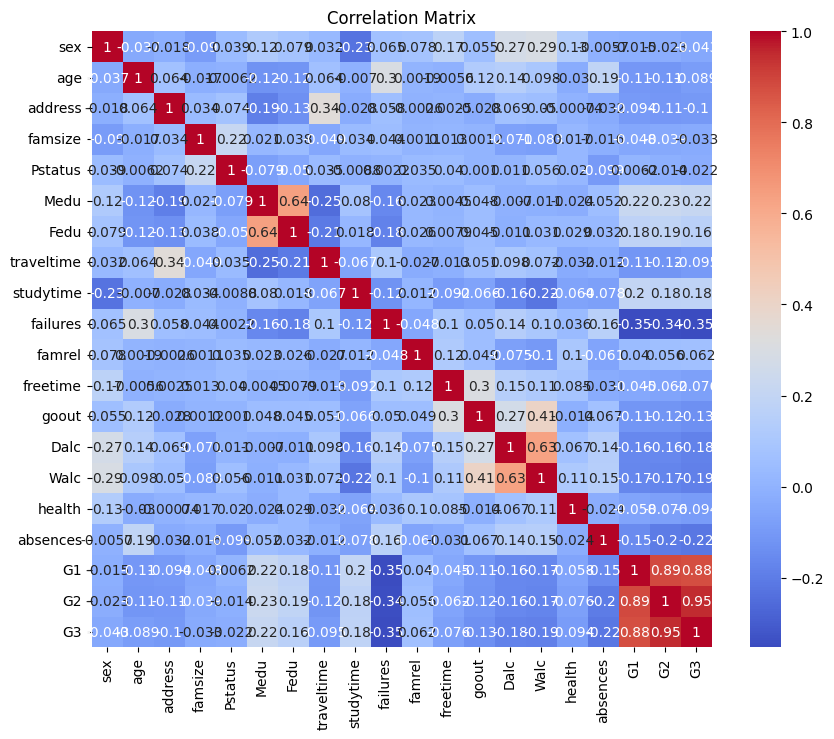

In [43]:

# Calculate the correlation matrix
corr_matrix = data_new.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

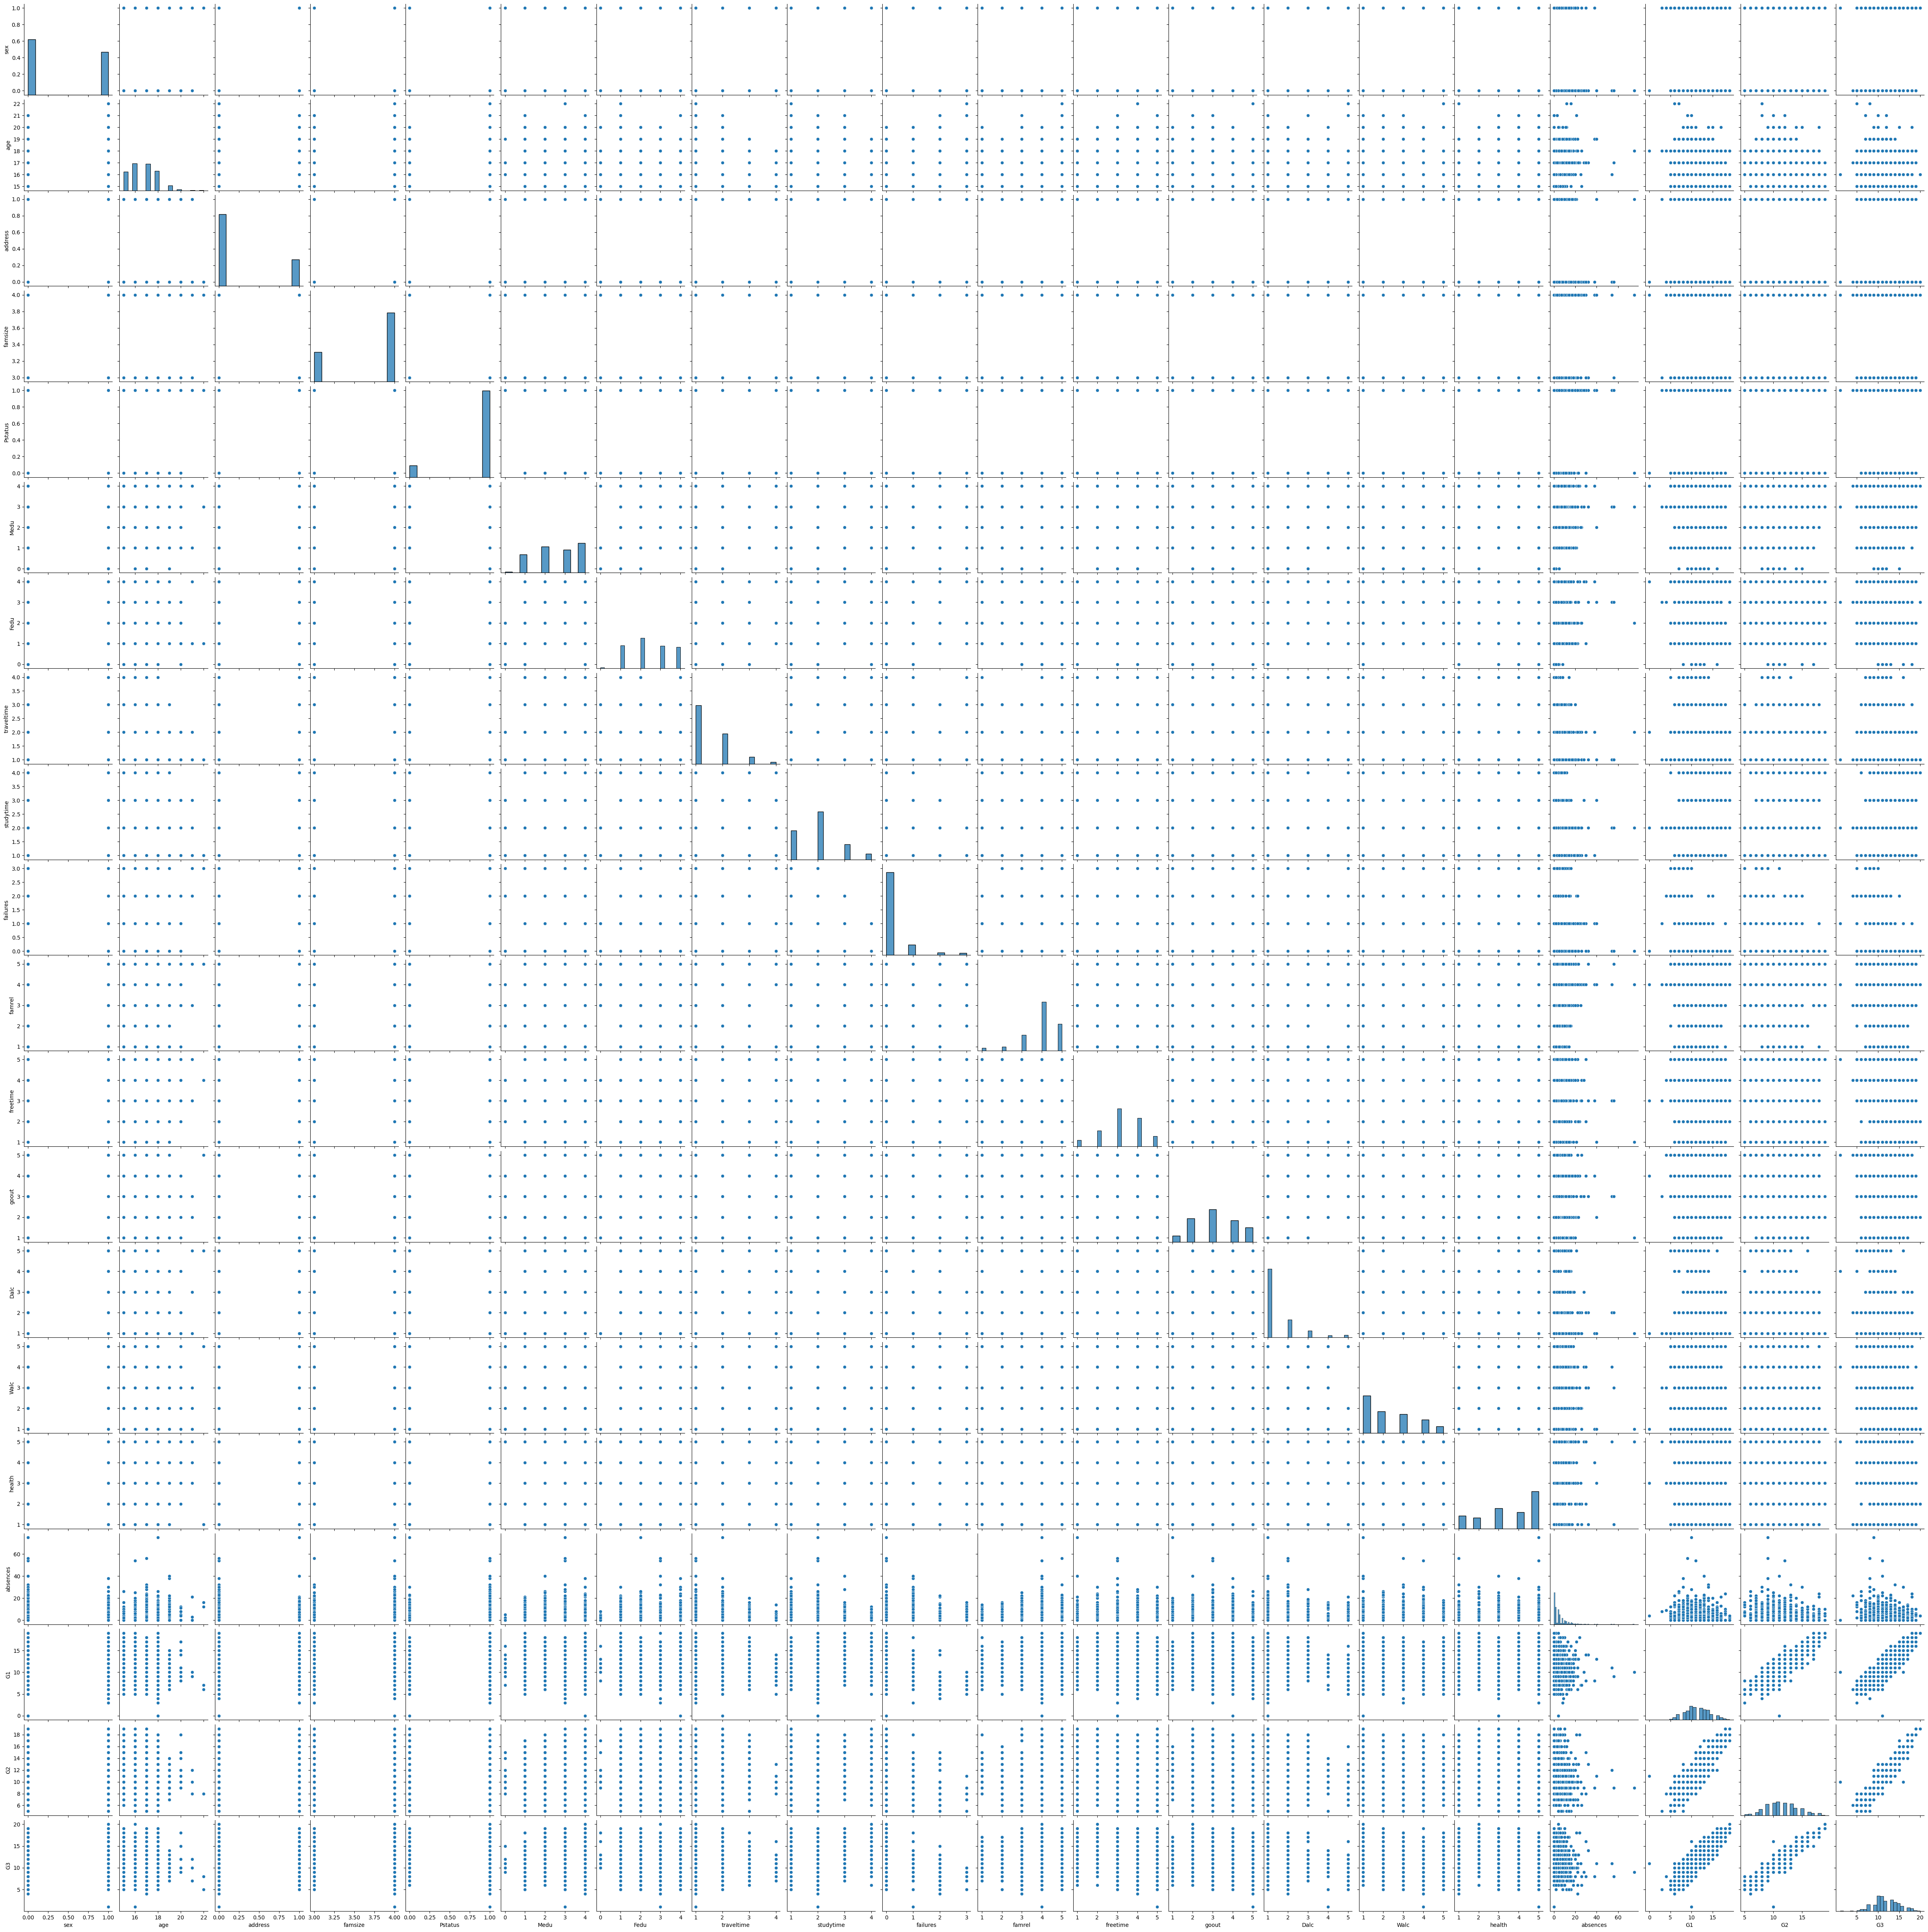

In [44]:
sns.pairplot(data_new)

In [51]:
feat = [ 'goout', 'freetime','studytime','Pstatus', 'famrel', 'health']
data_new = data_new[feat]

In [52]:
data_new.head()

,goout,freetime,studytime,Pstatus,famrel,health
0,4,3,2,0,4,3
1,3,3,2,1,5,3
2,2,3,2,1,4,3
3,2,2,3,1,3,4
4,2,3,2,1,4,4


**Exporting final dataset**

In [54]:
data_new.to_csv('final_dataset2.csv')